In [2]:
import numpy as np
from keras.layers import Input,Dense,Activation
from keras.models import Model
from keras.utils import np_utils
import pandas as pd
#dropout is method to reduce overfitting..it does increase accuracy..

In [12]:
ds = pd.read_csv("d:/ML--perceptron/mnist/train.csv")
data=ds.values[100:4600,1:]/255.0 #dont need label as performing unsupervised exp..
print (data.shape)

(4500, 784)


In [11]:
inp = Input(shape=(784,))
h1 = Dense(100)
a1 = Activation('sigmoid') ##a1 pointer to such class(activation)
y = Dense(784)
ya = Activation('sigmoid')

yout = ya(y(a1(h1(inp))))
model = Model(inputs=[inp], outputs=[yout])
#model.summary()

#dropout is good in classification problems.. to get rid of rigid patterns..
## Encoder :-
enc_out = a1(h1(inp))
encoder = Model(inputs=[inp], outputs=[enc_out])

## Decoder :-
dec_inp = Input(shape=(100,))
dec_out = ya(y(a1(dec_inp)))
decoder = Model(inputs=[dec_inp], outputs=[dec_out])

In [13]:
model.compile(optimizer='adam',loss='MSE',metrics=['accuracy'])

In [14]:
split = int(0.8*data.shape[0])

In [24]:
model.fit(data[:split],data[:split],nb_epoch=60,batch_size=30, verbose =2, validation_data=(data[split:],data[split:]))

c:\python\python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 3600 samples, validate on 900 samples
Epoch 1/60
 - 1s - loss: 0.0214 - acc: 0.0136 - val_loss: 0.0216 - val_acc: 0.0111
Epoch 2/60
 - 1s - loss: 0.0205 - acc: 0.0125 - val_loss: 0.0208 - val_acc: 0.0078
Epoch 3/60
 - 1s - loss: 0.0197 - acc: 0.0111 - val_loss: 0.0201 - val_acc: 0.0044
Epoch 4/60
 - 1s - loss: 0.0190 - acc: 0.0122 - val_loss: 0.0194 - val_acc: 0.0067
Epoch 5/60
 - 1s - loss: 0.0183 - acc: 0.0122 - val_loss: 0.0187 - val_acc: 0.0067
Epoch 6/60
 - 1s - loss: 0.0176 - acc: 0.0122 - val_loss: 0.0182 - val_acc: 0.0044
Epoch 7/60
 - 1s - loss: 0.0170 - acc: 0.0133 - val_loss: 0.0176 - val_acc: 0.0056
Epoch 8/60
 - 1s - loss: 0.0164 - acc: 0.0117 - val_loss: 0.0170 - val_acc: 0.0044
Epoch 9/60
 - 1s - loss: 0.0159 - acc: 0.0136 - val_loss: 0.0166 - val_acc: 0.0067
Epoch 10/60
 - 1s - loss: 0.0153 - acc: 0.0119 - val_loss: 0.0161 - val_acc: 0.0044
Epoch 11/60
 - 1s - loss: 0.0148 - acc: 0.0117 - val_loss: 0.0157 - val_acc: 0.0056
Epoch 12/60
 - 1s - loss: 0.0144 - acc

In [25]:
ex=encoder.predict(data[100:200])

In [26]:
dx=decoder.predict(ex)

In [27]:
import matplotlib.pyplot as plt

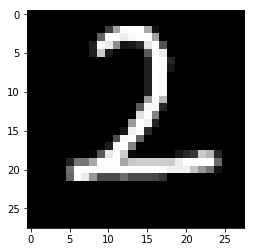

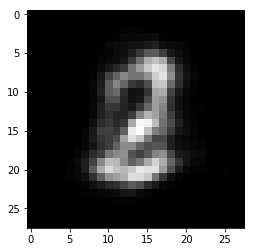

In [39]:
n = np.random.choice(100)

plt.imshow(data[n+100].reshape((28,28)),cmap='gray')
plt.show()

plt.imshow(dx[n].reshape((28,28)),cmap='gray')